# Bitcoin Analysis
## Attempt to determine the direction of crypto asset movement based on selected market information as well as to identify if there are leading indicators that could point the direction of movement. 
### Data obtained from [Coinmetrics](https://docs.coinmetrics.io/api/) API where free community level subscription allows for 1,000 data points

In [31]:
import os
import matplotlib 
import matplotlib.pyplot as plt
import json
import datetime as dt
from datetime import datetime
from coinmetrics.api_client import CoinMetricsClient
import pandas as pd
%matplotlib inline

In [32]:
#Obtain data by specifying coin and data needed
client = CoinMetricsClient()
btc_metrics = client.get_asset_metrics(assets='btc',metrics=['PriceUSD','AdrActCnt','CapAct1yrUSD','NVTAdj','VelCur1yr','TxCnt','TxTfrValAdjUSD','SplyCur'],start_time='2021-01-01',end_time='2021-05-23')
btc_metrics = pd.DataFrame(btc_metrics)
btc_metrics['time'] = pd.to_datetime(btc_metrics['time'])
btc_metrics = btc_metrics.set_index('time')

In [33]:
#Obtain coin metrics from Coinmetrics API 
btc_metrics = btc_metrics[['PriceUSD','CapAct1yrUSD','NVTAdj','VelCur1yr','TxCnt','TxTfrValAdjUSD','SplyCur']].round(2).astype('float').dropna()
btc_metrics

,PriceUSD,CapAct1yrUSD,NVTAdj,VelCur1yr,TxCnt,TxTfrValAdjUSD,SplyCur
time,,,,,,,
2021-01-01 00:00:00+00:00,29380.693733,2.235637e+11,75.406404,11.390438,261318.0,7.242360e+09,1.858773e+07
2021-01-02 00:00:00+00:00,32022.681058,2.455801e+11,49.988167,11.385750,297595.0,1.190800e+10,1.858867e+07
2021-01-03 00:00:00+00:00,33277.835305,2.559055e+11,74.183233,11.390510,359641.0,8.339130e+09,1.858966e+07
2021-01-04 00:00:00+00:00,31802.146714,2.454812e+11,58.161383,11.409751,370865.0,1.016526e+10,1.859074e+07
2021-01-05 00:00:00+00:00,34013.174172,2.630204e+11,62.990397,11.417236,355008.0,1.003905e+10,1.859172e+07
...,...,...,...,...,...,...,...
2021-05-19 00:00:00+00:00,37642.520002,3.194855e+11,32.864548,11.142599,264932.0,2.143461e+10,1.871391e+07
2021-05-20 00:00:00+00:00,40799.402148,3.463830e+11,43.089512,11.187136,226451.0,1.771997e+10,1.871461e+07
2021-05-21 00:00:00+00:00,37174.331101,3.159360e+11,51.443433,11.210069,225921.0,1.352932e+10,1.871530e+07


<AxesSubplot:title={'center':'BTC Price'}, xlabel='time', ylabel='BTC Price ($)'>

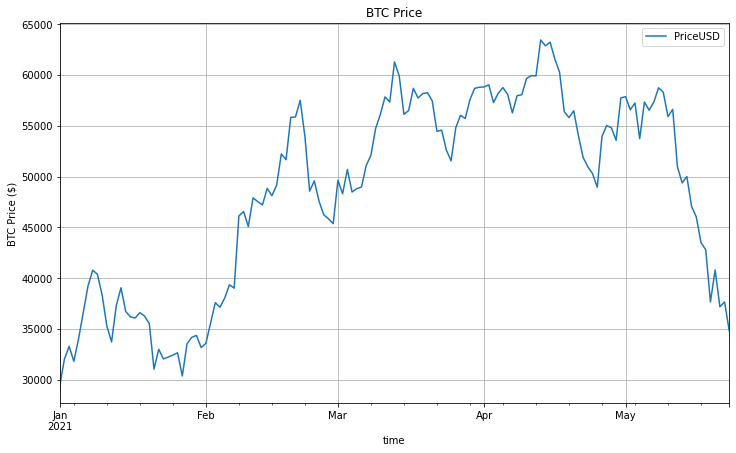

In [34]:
btc_price = btc_metrics[['PriceUSD']]
btc_price.plot(figsize= (12,7), grid=True, title="BTC Price",ylabel='BTC Price ($)')

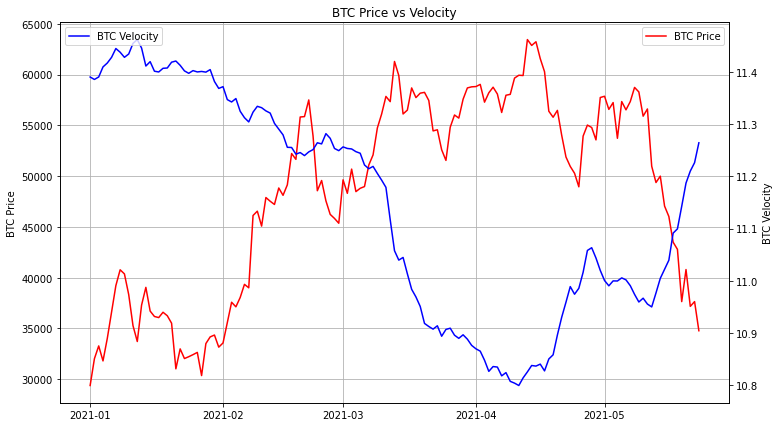

In [35]:
#Plot coin velocity vs coin price (velocity has inverse correlation with coin price)
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(btc_metrics['PriceUSD'], label ='BTC Price', color='r')
ax.set_ylabel('BTC Price')
ax.legend(loc='upper right')
plt.grid()

ax2 = ax.twinx()
plt.plot(btc_metrics['VelCur1yr'], label='BTC Velocity', color='b')
ax.set_title('BTC Price vs Velocity')
ax2.set_ylabel('BTC Velocity') 
ax2.legend(loc='upper left')

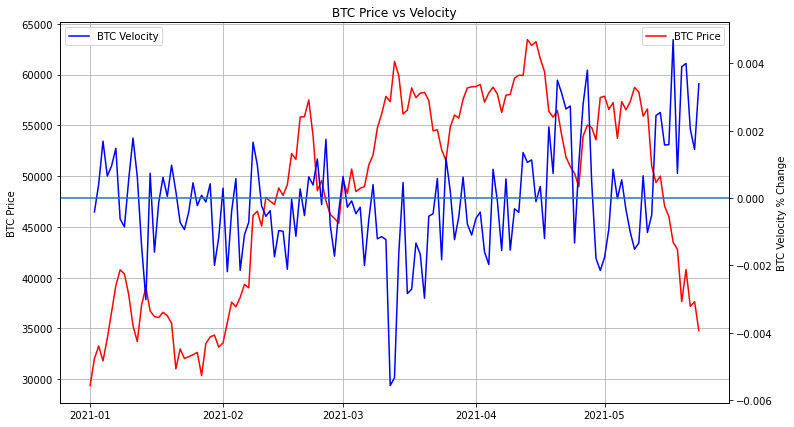

In [36]:
#Plot % Velocity change
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(btc_metrics['PriceUSD'], label ='BTC Price', color='r')
ax.set_ylabel('BTC Price')
ax.legend(loc='upper right')
plt.grid()

ax2 = ax.twinx()
plt.plot(btc_metrics['VelCur1yr'].pct_change().dropna(), label='BTC Velocity', color='b')
ax.set_title('BTC Price vs Velocity')
ax2.set_ylabel('BTC Velocity % Change') 
ax2.legend(loc='upper left')
plt.axhline(0)

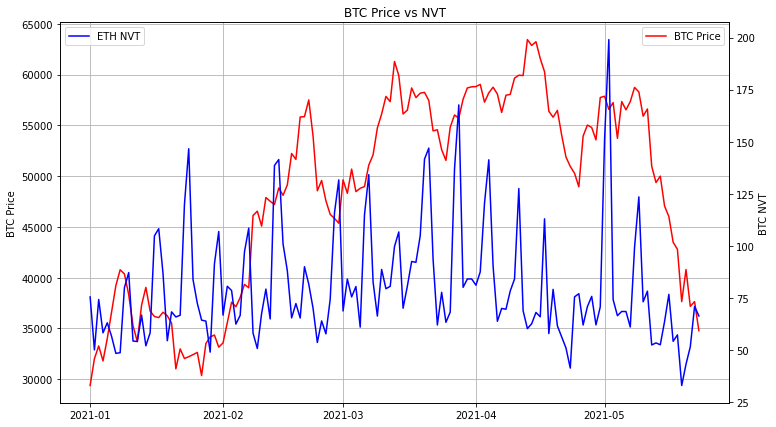

In [37]:
#Plot coin NVT - Network Value to Transaction (NVT) Ratio describes the relationship between market cap and transfer volumes (inverse velocity)
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(btc_metrics['PriceUSD'], label ='BTC Price', color='r')
ax.set_ylabel('BTC Price')
ax.legend(loc='upper right')
plt.grid()

ax2 = ax.twinx()
plt.plot(btc_metrics['NVTAdj'], label='ETH NVT', color='b')
ax.set_title('BTC Price vs NVT')
ax2.set_ylabel('BTC NVT') 
ax2.legend(loc='upper left')

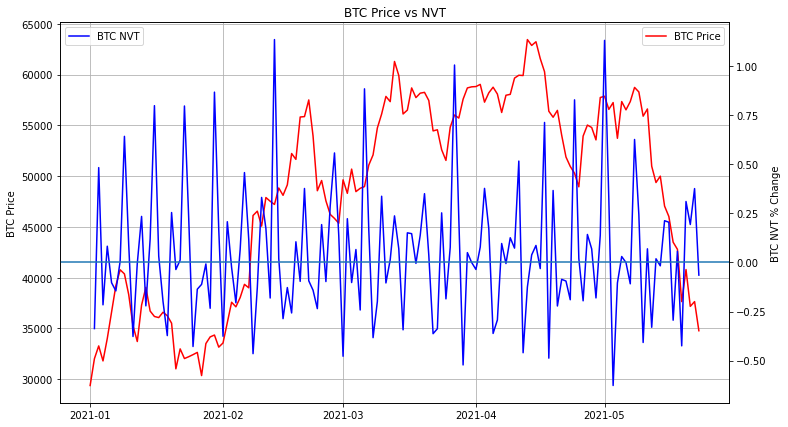

In [38]:
#Plot % NVT Change 
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(btc_metrics['PriceUSD'],label ='BTC Price', color='r')
ax.set_ylabel('BTC Price')
ax.legend(loc='upper right')
plt.grid()

ax2 = ax.twinx()
plt.plot(btc_metrics['NVTAdj'].pct_change().dropna(), label='BTC NVT', color='b')
ax.set_title('BTC Price vs NVT')
ax2.set_ylabel('BTC NVT % Change') 
ax2.legend(loc='upper left')
plt.axhline(0)

In [39]:
btc_metrics.to_csv('resources/btc_metrics.csv')

In [40]:
eth_metrics = pd.read_csv('resources/eth_metrics.csv',parse_dates=True, index_col='time')

<AxesSubplot:title={'center':'BTC Tx Count'}, xlabel='time'>

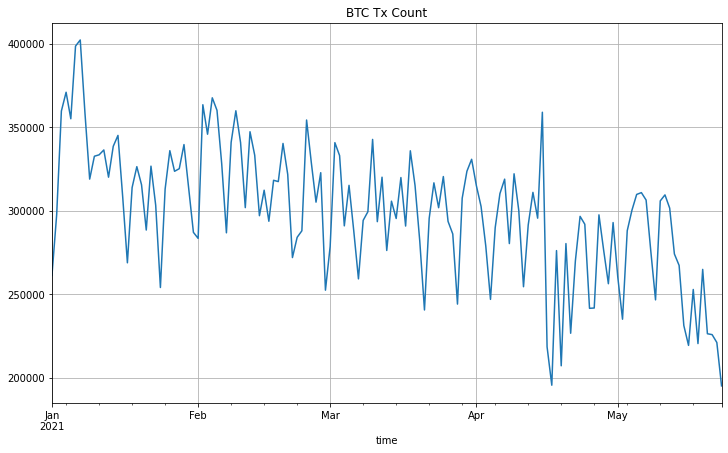

In [41]:
# Plot BTC transaction count
btc_metrics['TxCnt'].plot(title='BTC Tx Count',figsize=(12,7),grid=True)

<AxesSubplot:title={'center':'ETH Tx Count'}, xlabel='time'>

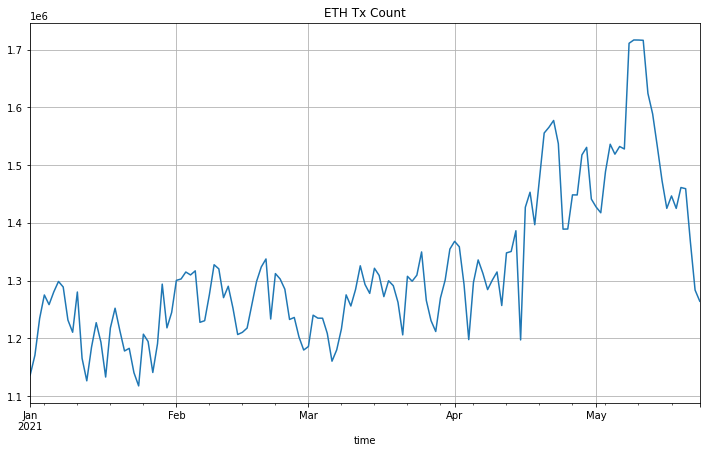

In [42]:
# Plot number of ETH transactions
eth_metrics['TxCnt'].plot(figsize=(12,7),title='ETH Tx Count',grid=True)